In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [64]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=10

In [33]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    'C:/Users/Nihala/OneDrive/Desktop/Soil Project/training1/Soil types',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 156 files belonging to 5 classes.


In [34]:
class_names=dataset.class_names
class_names

['Black Soil', 'Cinder Soil', 'Laterite Soil', 'Peat Soil', 'Yellow Soil']

In [35]:
len(dataset)

5

In [36]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[3 1 4 2 3 0 2 3 2 0 0 1 0 2 0 4 3 3 2 2 4 1 1 0 3 2 4 2 3 4 2 2]


In [38]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].shape)
    print(image_batch[0].numpy())

(256, 256, 3)
[[[35.035156   34.035156   39.035156  ]
  [37.158203   36.158203   41.158203  ]
  [40.351562   39.351562   44.351562  ]
  ...
  [43.17578    42.17578    48.17578   ]
  [42.052734   41.052734   47.052734  ]
  [43.964844   42.964844   48.964844  ]]

 [[36.041855   35.041855   40.041855  ]
  [37.666016   36.666016   41.666016  ]
  [40.859375   39.859375   44.859375  ]
  ...
  [42.66797    41.66797    47.66797   ]
  [41.06389    40.06389    46.06389   ]
  [43.94699    42.94699    48.94699   ]]

 [[37.55664    36.55664    41.55664   ]
  [38.68779    37.68779    42.68779   ]
  [41.710938   40.710938   45.710938  ]
  ...
  [42.387054   41.387054   47.387054  ]
  [40.455368   39.455368   45.455368  ]
  [43.759476   42.759476   48.759476  ]]

 ...

 [[ 8.249252    8.249252    6.6086273 ]
  [ 6.31221     6.31221     4.671585  ]
  [ 3.5369415   3.5369415   1.8963165 ]
  ...
  [10.722656   10.722656   11.082031  ]
  [11.845703   11.845703   12.205078  ]
  [18.95192    18.95192    19.

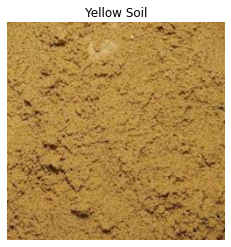

In [40]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")

In [47]:
train_split=0.8
train_size=int(len(dataset)*train_split)

In [49]:
train_ds=dataset.take(train_size)
len(train_ds)

4

In [52]:
def get_dataset_partitions_tf(ds,train_split=0.8,test_split=0.1,val_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds,test_ds,val_ds

In [53]:
train_ds,test_ds,val_ds=get_dataset_partitions_tf(dataset)

In [56]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [57]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomContrast(factor=0.2),
    layers.experimental.preprocessing.RandomZoom(0.2)])

In [60]:
input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes=5
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')            
])
model.build(input_shape=input_shape)

In [61]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_3 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [62]:
model.compile(
optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics=['acc']
)

In [65]:
history=model.fit(
train_ds,
epochs=EPOCHS,
batch_size=BATCH_SIZE,
verbose=1,
validation_data=val_ds
)

Epoch 1/10
4/4 [==============================] - 15s 3s/step - loss: 2.0144 - acc: 0.1250
Epoch 2/10
4/4 [==============================] - 10s 2s/step - loss: 1.5347 - acc: 0.3594
Epoch 3/10
4/4 [==============================] - 10s 2s/step - loss: 1.3458 - acc: 0.3516
Epoch 4/10
4/4 [==============================] - 10s 2s/step - loss: 1.1918 - acc: 0.3672
Epoch 5/10
4/4 [==============================] - 9s 2s/step - loss: 1.0216 - acc: 0.5938
Epoch 6/10
4/4 [==============================] - 10s 2s/step - loss: 0.9096 - acc: 0.5391
Epoch 7/10
4/4 [==============================] - 9s 2s/step - loss: 0.8685 - acc: 0.7031
Epoch 8/10
4/4 [==============================] - 9s 2s/step - loss: 0.7337 - acc: 0.7422
Epoch 9/10
4/4 [==============================] - 9s 2s/step - loss: 0.6485 - acc: 0.7656
Epoch 10/10
4/4 [==============================] - 9s 2s/step - loss: 0.5481 - acc: 0.7969


In [66]:
scores=model.evaluate(test_ds)
scores

1/1 [==============================] - 1s 1s/step - loss: 0.5385 - acc: 0.7857


[0.5385024547576904, 0.7857142686843872]

In [77]:
def predict(model,image):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)
    
    predictions=model.predict(img_array)
    print(predictions)
    
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 61ms/step
[[5.83660677e-02 8.84863794e-01 1.38692785e-05 5.67480288e-02
  8.23892515e-06]]
1/1 [==============================] - 0s 55ms/step
[[1.6619493e-01 5.4279727e-01 1.1049982e-03 2.8962535e-01 2.7741009e-04]]
1/1 [==============================] - 0s 57ms/step
[[1.0244616e-04 6.3724385e-04 9.8193687e-01 7.0831558e-04 1.6615134e-02]]
1/1 [==============================] - 0s 53ms/step
[[5.5740274e-02 9.3931067e-01 9.7015300e-07 4.9470346e-03 9.6267661e-07]]
1/1 [==============================] - 0s 46ms/step
[[5.2197720e-04 1.1968197e-02 6.3838851e-01 3.0047018e-02 3.1907427e-01]]
1/1 [==============================] - 0s 50ms/step
[[7.3609488e-07 4.9551738e-05 1.6633892e-01 8.8654364e-05 8.3352208e-01]]
1/1 [==============================] - 0s 55ms/step
[[1.7365485e-02 9.2362714e-01 6.8308977e-06 5.8994066e-02 6.4398037e-06]]
1/1 [==============================] - 0s 55ms/step
[[0.12888704 0.23831905 0.15372963 0.44403765 0.03502668]]


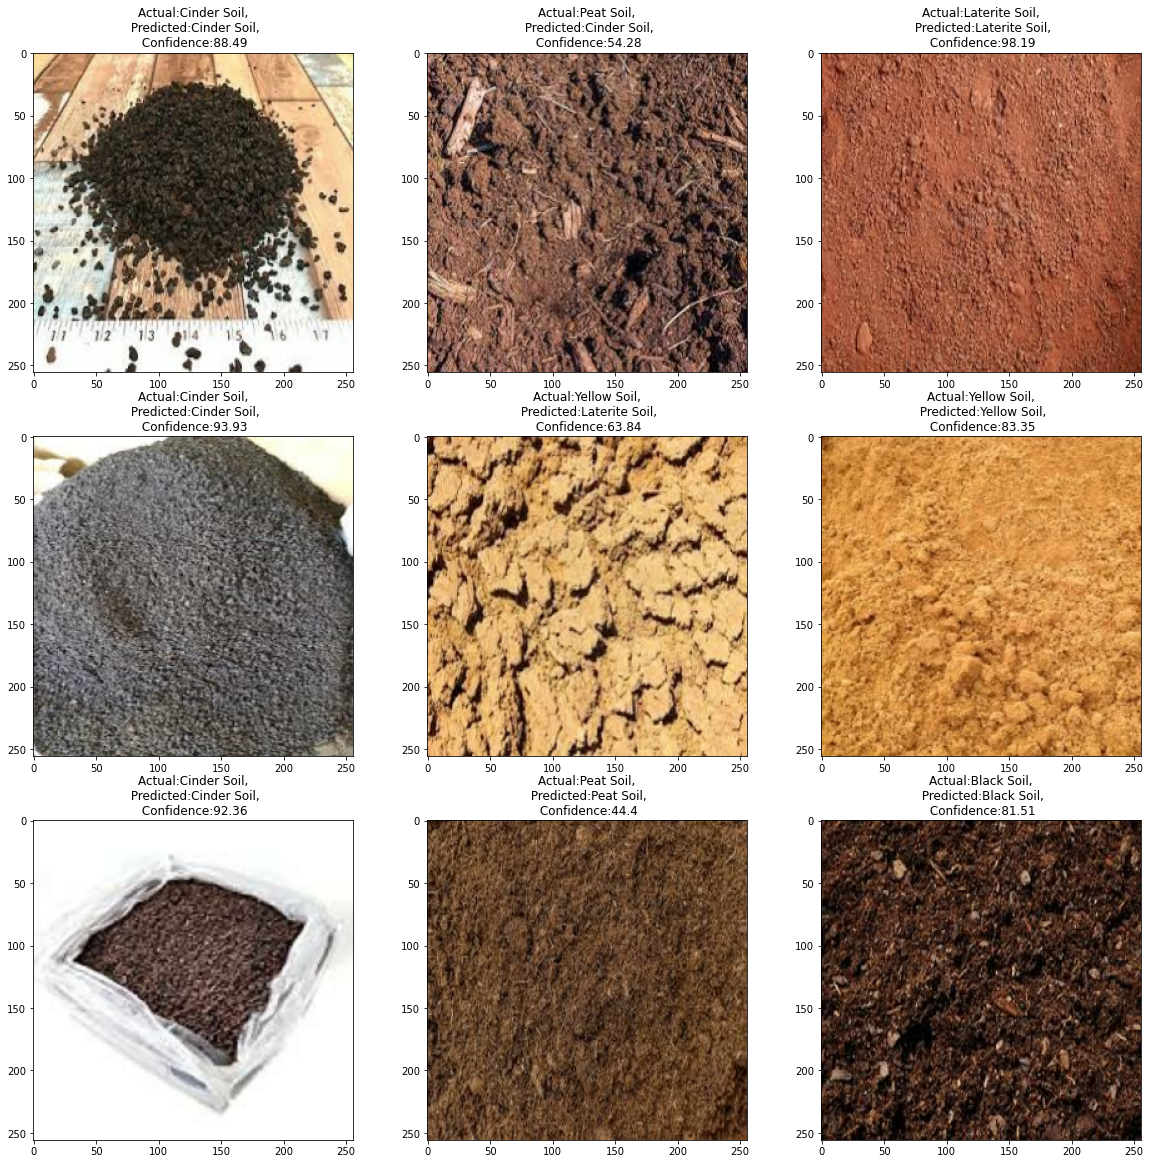

In [80]:
plt.figure(figsize=(20,20))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        
        plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class},\n Confidence:{confidence}")
        plt.axis='off'
        

In [81]:
model.save("soilmodel.h5")

In [ ]:
from numpy import loadtxt
from tensorflow.keras.models import load_model
 
# load model
model = load_model('simplemodel.h5')
# summarize model.
model.summary()

1/1 [==============================] - 0s 467ms/step
Unique true labels: [0 1 2 3 4]
Unique predicted labels: [0 1 2 3 4]


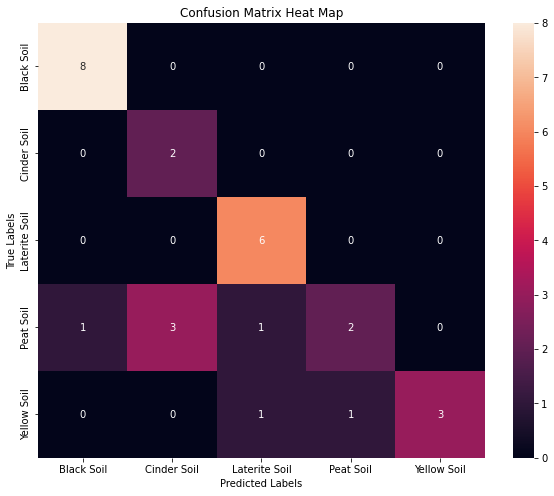

In [82]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have a trained model 'model' and datasets 'train_ds', 'val_ds', 'test_ds'
true_labels = []
predicted_labels = []

for image_batch, label_batch in test_ds:
    predictions = model.predict(image_batch)
    predicted_labels.extend(np.argmax(predictions, axis=-1))
    true_labels.extend(label_batch.numpy().astype(int))

true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

print("Unique true labels:", np.unique(true_labels))
print("Unique predicted labels:", np.unique(predicted_labels))

cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heat Map')
plt.show()

In [83]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.40      1.00      0.57         2
           2       0.75      1.00      0.86         6
           3       0.67      0.29      0.40         7
           4       1.00      0.60      0.75         5

    accuracy                           0.75        28
   macro avg       0.74      0.78      0.70        28
weighted avg       0.79      0.75      0.73        28

